# Критерии однородности

## Задача 2

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = np.load('hw6t2.npy')

In [3]:
X = data[:, 0]
Y = data[:, 1]

In [4]:
np.unique(Y).shape

(100,)

In [5]:
X.shape == Y.shape

True

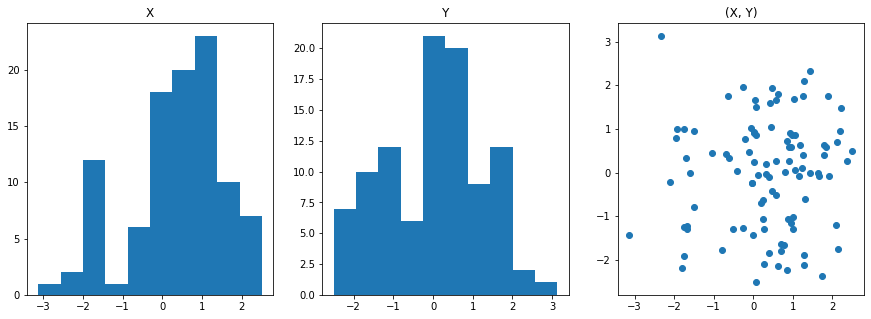

In [6]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.hist(X, bins = 10)
plt.title('X')

plt.subplot(1, 3, 2)
plt.hist(Y, bins = 10)
plt.title('Y')

plt.subplot(1, 3, 3)
plt.scatter(X, Y)
plt.title('(X, Y)')
plt.show()

Судя по графикам, распределения выборок не очень похожи, но не будем делать поспешных выводов.

In [7]:
print(sps.spearmanr(X, Y))
print(sps.kendalltau(X, Y))

SpearmanrResult(correlation=0.07018301830183017, pvalue=0.4877682990353678)
KendalltauResult(correlation=0.0492929292929293, pvalue=0.46743395879054583)


Таким образом, принимаем гипотезу о независимости выборок на уровне значимости 0.05.

In [8]:
samp = np.concatenate((X, Y), 0)
np.unique(samp).shape

(158,)

In [9]:
order = sps.rankdata(samp) 
ind1 = sps.rankdata(X) 
ind2 = sps.rankdata(Y)

In [10]:
Z = 1/200 * (1/6 + 1/100*np.sum((order[:100] - ind1)**2) + 1/100*np.sum((order[100:] - ind2)**2)) - 2*100*100/(3*200)

In [11]:
Z

0.577050000000007

Нужная нам квантиль для $\alpha = 0.05$ равна 0.46. Таким образом, мы отвергаем гипотезу об однородности выборок на уровне значимости 0.05.

In [12]:
EZ = 1/6 * (1 + 1/200)
DZ = 1/45 * (1 + 1/200) * (1 + 1/200 - 3*200/(4*100*100))

In [13]:
(Z - EZ)/np.sqrt(45 * DZ) - 1/6

0.24392138034513808

На лекции было сказано, что такая модификация статистики Z хорошо приближается распределением $A_1$, начиная с 7 наблюдений. И она говорит нам не отвергать гипотезу об однородности выборок на уровне значимости 0.05. Мы получили два результата, противоречащие друг другу, посмотрим на другие критерии.

In [14]:
sps.anderson_ksamp([X, Y])

Anderson_ksampResult(statistic=2.4571124118904, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.031897517816248)

Критерий Андерсона-Дарлинга говорит нам отвергнуть гипотезу о том, что выборки из одного распределения на уровне значимости 0.05.

In [15]:
sps.ks_2samp(X, Y)

Ks_2sampResult(statistic=0.18, pvalue=0.07822115797841851)

Критерий Смирнова даёт очень маленькое p-value, однако оно не меньше 0.05, поэтому этот тест говорит нам принять гипотезу об однородности выборок...

Результаты получились довольно неоднозначными, но если смотреть на статистики $Z$ и $Z^*$, то скорее, нам нужно всё-таки принять гипотезу, так как $Z$ при верной гипотезе приближается распределением $A_1$ для достаточно больших m и n, что является достаточно расплывчатой формулировкой (вдруг 100 наблюдений всё ещё недостаточно), а 7 наблюдений для статистики $Z^*$ у нас точно есть.

## Задача 3

In [16]:
weight = pd.read_csv('weight.txt', sep='\t')

In [17]:
before = weight['Before']
after = weight['After']

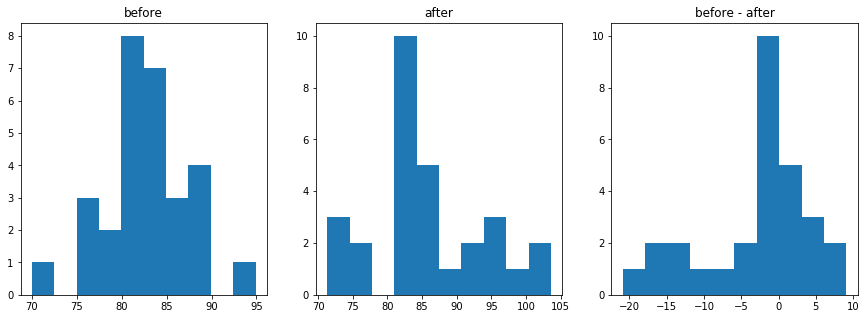

In [18]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.hist(before, bins = 10)
plt.title('before')

plt.subplot(1, 3, 2)
plt.hist(after, bins = 10)
plt.title('after')

plt.subplot(1, 3, 3)
plt.hist(before - after)
plt.title('before - after')
plt.show()

Распределение разности не очень похоже на симметричное, но проверим ещё одним способом: нанесём на график точки $(-V_{(i)} + \hat{\mu}; V_{n - i +1} - \hat{\mu}), \text{ где } i = 1, \ldots, \lfloor \frac{n}{2} \rfloor.$

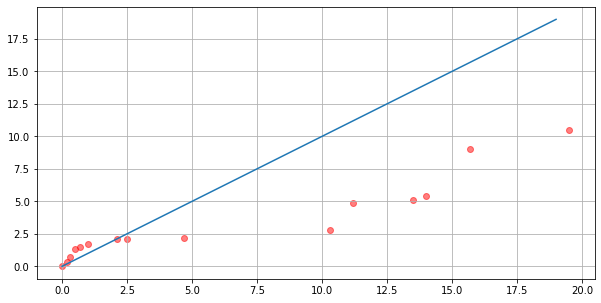

In [19]:
V = before - after
n = len(V)
mu = np.median(V)
plt.figure(figsize = (10, 5))
plt.scatter(-np.sort(V)[:int(n/2)+1] + mu, np.flip(np.sort(V), axis=0)[:int(n/2)+1] - mu, color = "r", alpha = 0.5)
plt.plot(np.arange(20), np.arange(20))
plt.grid()
plt.show()

Точки не приближаются прямой $y = x$, а значит, распределение V не является симметричным и мы не можем применить критерий ранговых знаков Уилкоксона. Проверим, являются ли выборки нормальными$/$независимыми.

In [20]:
print(sps.shapiro(before))
print(sps.shapiro(after))

(0.9699368476867676, 0.5579800605773926)
(0.9519608616828918, 0.20574407279491425)


Таким образом, принимаем гипотезу о нормальности выборок на уровне значимости 0.05.

In [21]:
print(sps.spearmanr(before, after))
print(sps.kendalltau(before, after))

SpearmanrResult(correlation=0.5741037721176, pvalue=0.0011277154493823669)
KendalltauResult(correlation=0.4573579036177395, pvalue=0.0005164530410263133)


Отвергаем гипотезу о независимости выборок на уровне значимости 0.05.

Кажется, что для парного t-теста всё-таки не требуется равенство дисперсий, поэтому применим его, чтобы проверить наличие эффекта.

In [22]:
sps.ttest_rel(before, after)

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

In [23]:
pvals = np.zeros(6)
pvals[0] = sps.shapiro(before)[1]
pvals[1] = sps.shapiro(after)[1]
pvals[2] = sps.normaltest(before)[1]
pvals[3] = sps.normaltest(after)[1]
pvals[4] = sps.spearmanr(before, after)[1]
pvals[5] = sps.ttest_rel(before, after)[1]

Соберём всё вместе, используя метод Холма (о характере зависимости статистик ничего не знаем).

In [24]:
from statsmodels.stats.multitest import multipletests

In [25]:
multipletests(pvals = pvals, alpha = 0.05, method = 'holm')

(array([False, False, False, False,  True, False]),
 array([1.        , 0.82297629, 1.        , 1.        , 0.00676629,
        0.17511299]),
 0.008512444610847103,
 0.008333333333333333)

Таким образом, мы принимаем гипотезу о том, что терапия не была эффективна.

## Задача 4

In [26]:
data = np.load('hw6t4.npy')

In [27]:
X = data[:, 0]
Y = data[:, 1]

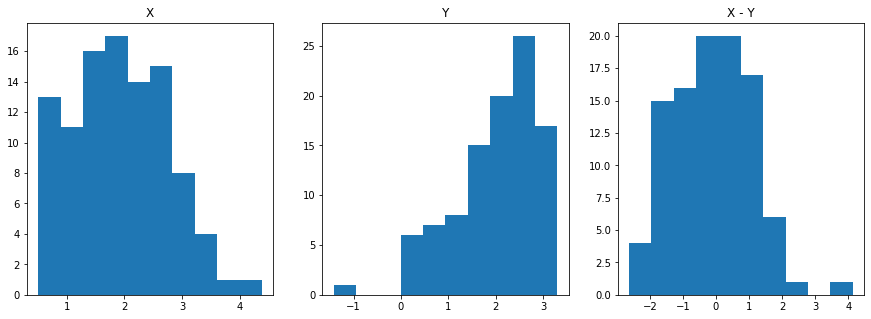

In [28]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.hist(X, bins = 10)
plt.title('X')

plt.subplot(1, 3, 2)
plt.hist(Y, bins = 10)
plt.title('Y')

plt.subplot(1, 3, 3)
plt.hist(X - Y)
plt.title('X - Y')
plt.show()

Кажется, что в выборке $Y$ есть выброс, который стоит убрать.

In [29]:
X = X[Y > -1]
Y = Y[Y > -1]

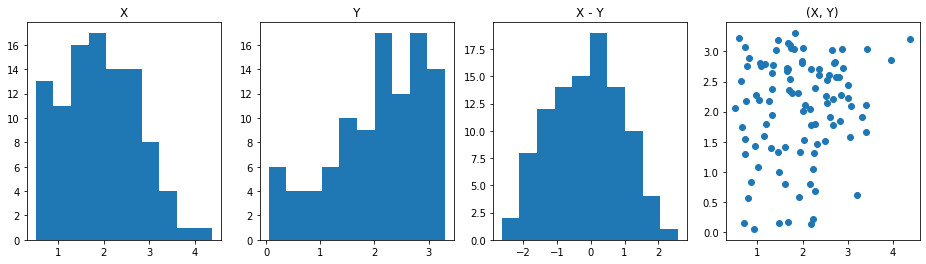

In [30]:
plt.figure(figsize = (16, 4))
plt.subplot(1, 4, 1)
plt.hist(X, bins = 10)
plt.title('X')

plt.subplot(1, 4, 2)
plt.hist(Y, bins = 10)
plt.title('Y')

plt.subplot(1, 4, 3)
plt.hist(X - Y)
plt.title('X - Y')

plt.subplot(1, 4, 4)
plt.scatter(X, Y)
plt.title('(X, Y)')
plt.show()

Похоже, что разность выборок имеет симметричное распределение, однако проверим вторым способом.

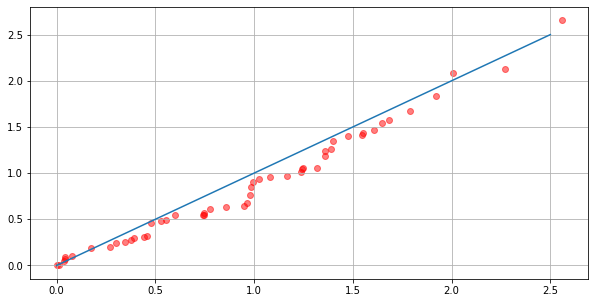

In [31]:
V = X - Y
n = len(V)
mu = np.median(V)
plt.figure(figsize = (10, 5))
plt.scatter(-np.sort(V)[:int(n/2)+1] + mu, np.flip(np.sort(V), axis=0)[:int(n/2)+1] - mu, color = "r", alpha = 0.5)
plt.plot(np.linspace(0, 2.5), np.linspace(0, 2.5))
plt.grid()
plt.show()

Точки хорошо приближаюся прямой $y = x$, поэтому можем считать распределение разности симметричным.

In [32]:
pvals = np.zeros(6)
pvals[0] = sps.shapiro(X)[1]
pvals[1] = sps.normaltest(X)[1]
pvals[2] = sps.shapiro(Y)[1]
pvals[3] = sps.normaltest(Y)[1]
pvals[4] = sps.spearmanr(X, Y)[1]
pvals[5] = sps.wilcoxon(X, Y)[1]

In [33]:
multipletests(pvals = pvals, alpha = 0.1, method = 'fdr_by')

(array([False, False,  True, False, False, False]),
 array([0.34904114, 0.86812884, 0.00135016, 0.12223839, 0.86812884,
        0.86812884]),
 0.01740680614731016,
 0.016666666666666666)

Мы воспользовались методом Бенджамини-Иекутиели, так как не имели информации о зависимости статистик.

Таким образом, мы принимаем гипотезу о нормальности выборки $X$, отвергаем гипотезу о нормальности $Y$, принимаем гипотезу о независимости выборок и принимаем гипотезу о том, что $X$ и $Y$ из одного распределения.

## Задача 5

Заметим, что распределение Стьюдента $t_{10}$ похоже на нормальное.

In [80]:
sample = sps.t.rvs(df=10, size=500)
print(sps.shapiro(sample))
print(sps.normaltest(sample))
print(sps.kstest(sample, sps.norm.cdf))

(0.9953148365020752, 0.13707245886325836)
NormaltestResult(statistic=4.44783248707293, pvalue=0.10818460088531351)
KstestResult(statistic=0.036090927376125403, pvalue=0.5308528833935966)


In [81]:
sample = sps.t.rvs(df=10, size=5000)
print(sps.shapiro(sample))
print(sps.normaltest(sample))
print(sps.kstest(sample, sps.norm.cdf))

(0.9942027926445007, 2.477385158995704e-13)
NormaltestResult(statistic=92.09947924018356, pvalue=1.0019641662414786e-20)
KstestResult(statistic=0.017199500222277765, pvalue=0.10380711203050566)


Однако принять гипотезу о нормальности мы всё-таки не можем, так как результаты тестов меняются от запуска к запуску, а также от размера выборки. Но помним, что критерий Стьюдента устойчив к отклонениям от нормальности. С помощью моделирования определим, как будет вести себя уровень значимости.

In [88]:
def T_crit(X, Y, alpha):
    n = X.shape[0]
    m = Y.shape[0]
    S = np.sqrt(((n - 1) * X.var() + (m - 1) * Y.var()) / (n + m - 2))
    T = np.abs(np.sqrt(n * m / (n + m)) * (np.mean(X) - np.mean(Y)) / S)
    return T > sps.t.ppf(1 - alpha / 2, n + m - 2)

In [89]:
def prac_alpha(n, alpha, N=10000):
    alphas = []
    for i in range(N):
        X = sps.t.rvs(10, size=n)
        Y = sps.t.rvs(10, size=n)
        alphas.append(T_crit(X, Y, alpha))
    return sum(alphas) / N

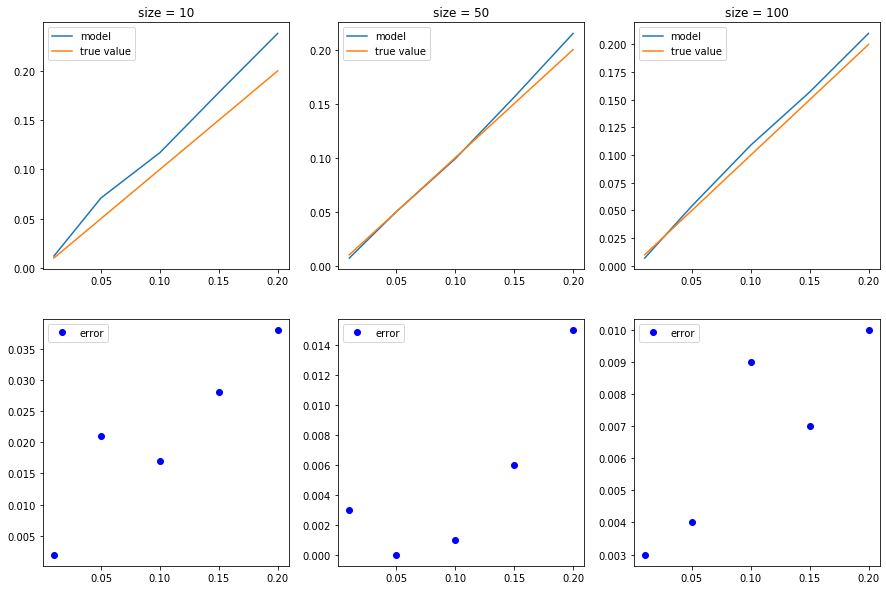

In [96]:
sizes = [10, 50, 100]
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]
num = 1000
plt.figure(figsize = (15, 10))
for size in sizes:
    plt.subplot(2, 3, sizes.index(size) + 1)
    result_alphas = np.array([get_real_alpha(size, alpha, num) for alpha in alphas])
    plt.plot(alphas, result_alphas, label="model")
    plt.plot(alphas, alphas, label="true value")
    plt.legend()
    plt.title("size = {}".format(size))
    plt.subplot(2, 3, sizes.index(size) + 4)
    plt.plot(alphas, np.abs(result_alphas - alphas), 'o', color = "b", label='error')
    plt.legend()

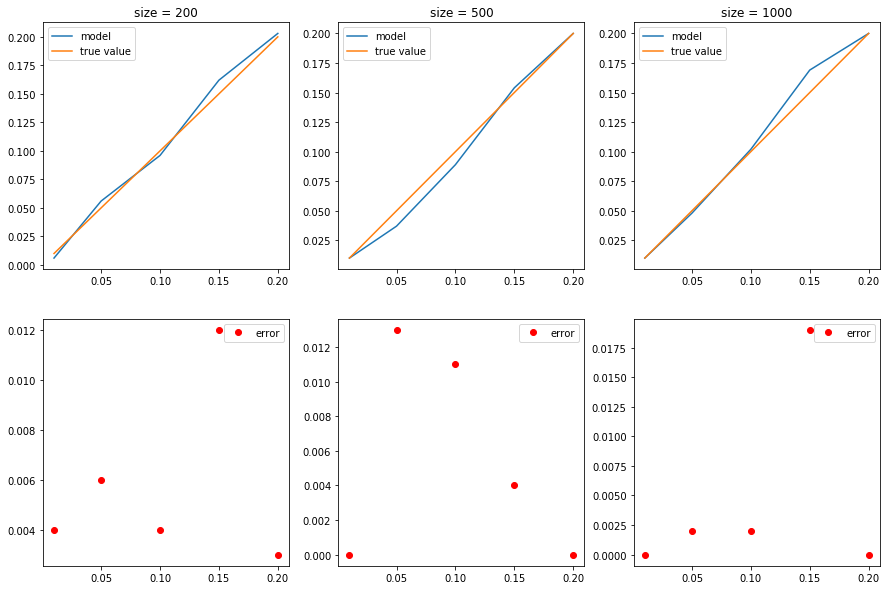

In [97]:
sizes = [200, 500, 1000]
plt.figure(figsize = (15, 10))
for size in sizes:
    plt.subplot(2, 3, sizes.index(size) + 1)
    result_alphas = np.array([get_real_alpha(size, alpha, num) for alpha in alphas])
    plt.plot(alphas, result_alphas, label="model")
    plt.plot(alphas, alphas, label="true value")
    plt.legend()
    plt.title("size = {}".format(size))
    plt.subplot(2, 3, sizes.index(size) + 4)
    plt.plot(alphas, np.abs(result_alphas - alphas), 'o', color = "r", label='error')
    plt.legend()

Таким образом, видим, что ошибка не превышает $20 \%$, а с ростом $n$ становится и вовсе близка к $5 \%$, поэтому я склоняюсь к тому, что критерий Стьюдента всё-таки можно применять в данном случае.